<a href="https://colab.research.google.com/github/a2r4vind/Machine-Learning-Models/blob/main/LinearClassifierFromScratchinTensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Implementing a linear classifier from scratch in Tensorflow

Generating two classes of random points in a 2D plane

In [2]:
import numpy as np

Linearly Separable synthetic data (2 classes of points in a 2D plane) is generated.

Each class of points is generated by drawing their coordinates from a random distribution with a specific **covariance matrix** and a specific **mean**.

The **Covariance matrix** describes the **shape of the point cloud**.

The **mean** describes the **position of the point** cloud in the plane.

The same covariance matrix for both point cloud but 2 different mean values so that point cloud will have the same shape, but different positions.




In [3]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(mean=[0,3], cov=[[1, 0.5],[0.5, 1]], size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(mean=[3, 0], cov=[[1, 0.5],[0.5, 1]], size=num_samples_per_class)

In [4]:
print(negative_samples.shape)
print(positive_samples.shape)

(1000, 2)
(1000, 2)


Stacking the 2 classes into an array with shape(2000,2)

In [5]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

#Generating the corresponding targets (0 and 1)

Generating the corresponding target labels, an array of zeros and ones of shape (2000,1), where targets[i,0] is 0 if input[i] belongs to class 0 and targets[i,0] is 1 if inputs[i] belongs to class 1.

In [6]:
targets = np.vstack((np.zeros((num_samples_per_class,1), dtype="float32"),
                     np.ones((num_samples_per_class,1), dtype="float32")))

#Plotting the two point classes

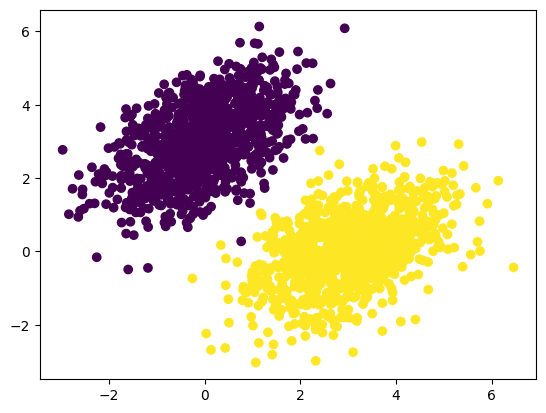

In [7]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:,0], inputs[:,1], c=targets[:,0])
plt.show()

A linear classifier is an affine transformation (**prediction = W . input + b**) trained to minimize the square of the difference between prediction and the targets.

# Creating the linear classifier variables

In [8]:
import tensorflow as tf

In [9]:
input_dim = 2
output_dim = 1
W = tf.Variable(tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(tf.zeros(shape=(output_dim,)))

# The feed forward pass funciton

In [10]:
def model(inputs):
  return tf.matmul(inputs, W) + b

#The Mean Squared error loss function

In [11]:
def square_loss(targets, predictions):
  per_sample_losses = tf.square(targets - predictions)
  return tf.reduce_mean(per_sample_losses)

#The training step function
==> receive some training data and updates the weights W and b so as to minimize the loss on the data.

In [12]:
learning_rate = 0.1

def training_step(inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_loss(predictions, targets)
  grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W,b])
  W.assign_sub(grad_loss_wrt_W * learning_rate)
  b.assign_sub(grad_loss_wrt_b * learning_rate)
  return loss

#The batch training loop

In [13]:
for step in range(40):
  loss = training_step(inputs, targets)
  print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 5.3191
Loss at step 1: 0.5481
Loss at step 2: 0.1861
Loss at step 3: 0.1348
Loss at step 4: 0.1211
Loss at step 5: 0.1125
Loss at step 6: 0.1051
Loss at step 7: 0.0984
Loss at step 8: 0.0922
Loss at step 9: 0.0866
Loss at step 10: 0.0814
Loss at step 11: 0.0767
Loss at step 12: 0.0723
Loss at step 13: 0.0683
Loss at step 14: 0.0646
Loss at step 15: 0.0613
Loss at step 16: 0.0582
Loss at step 17: 0.0553
Loss at step 18: 0.0527
Loss at step 19: 0.0504
Loss at step 20: 0.0482
Loss at step 21: 0.0462
Loss at step 22: 0.0443
Loss at step 23: 0.0426
Loss at step 24: 0.0411
Loss at step 25: 0.0397
Loss at step 26: 0.0384
Loss at step 27: 0.0372
Loss at step 28: 0.0361
Loss at step 29: 0.0350
Loss at step 30: 0.0341
Loss at step 31: 0.0333
Loss at step 32: 0.0325
Loss at step 33: 0.0318
Loss at step 34: 0.0311
Loss at step 35: 0.0305
Loss at step 36: 0.0300
Loss at step 37: 0.0295
Loss at step 38: 0.0290
Loss at step 39: 0.0286


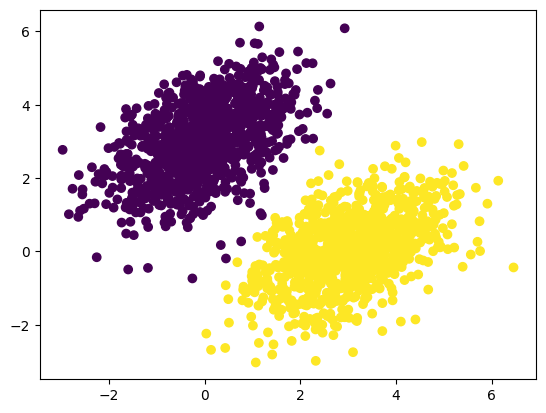

In [14]:
predictions = model(inputs)
plt.scatter(inputs[:,0], inputs[:,1], c=predictions[:, 0]>0.5)
plt.show()

#Plotting the line separating the 2 classes.

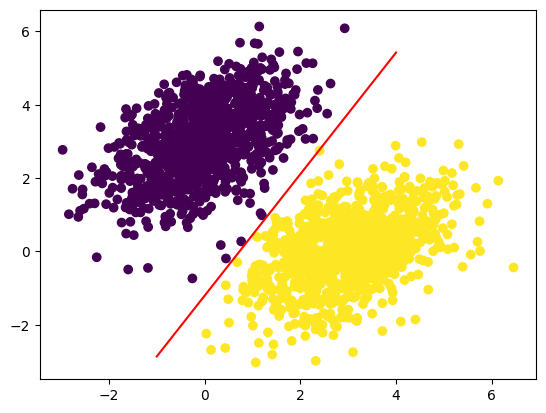

In [15]:
x = np.linspace(-1, 4, 100)
y = -W[0] / W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:,0], inputs[:,1], c = predictions[:, 0] > 0.5)